In [6]:
% matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import datetime, random
from pandas import Series, DataFrame

In [9]:
filepath = '/media/bigdata_log/RIL/Samsung/csv/combined/PM/RACH Usage-4.0.0.csv/part-00000'
df = pd.read_csv(filepath)
df = df.drop(df.columns[[0,1,3,7,8,9,10]],axis=1)

In [10]:
def getretrans(data):
    return data[0]-data[1]

# get statistics for a specific cell
EARFCN = 'EarfcnDl1616'
NEID = 2764
cellID = 'cNum5'
df_numRA = df[(df.EarfcnDl==EARFCN)&(df.NE_ID==NEID)&(df.cNum==cellID)][['EVENT_TIME',
                                                                         'RACHReportsRcvNum(count)',
                                                                         'PreambleSent1(count)']]
df_numRA['RetransNum'] = df_numRA[['RACHReportsRcvNum(count)','PreambleSent1(count)']].apply(getretrans,axis=1)
                                                                         
df_numRA.sort(columns='EVENT_TIME',inplace=True)
df_numRA.head()

/home/zliu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,EVENT_TIME,RACHReportsRcvNum(count),PreambleSent1(count),RetransNum
5697,2015-05-09 16:15:00,5,5,0
2307,2015-05-09 16:30:00,7,7,0
11366,2015-05-09 16:45:00,10,10,0
20492,2015-05-09 17:15:00,7,7,0
28496,2015-05-09 17:30:00,0,0,0


### ====== plot datetime in x axis ======

www.seehuhn.de/pages/pdate

#### === method one: to pandas timestamp object then to datetime and plot

In [11]:
df

datetime.datetime(2015, 5, 9, 16, 15)

#### === method two: convert string to datetime with strptime()
> * easier for irregular formatted time string

In [87]:
time1 = map(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'), df_numRA.EVENT_TIME.tolist())
time1[0]

datetime.datetime(2015, 5, 9, 16, 15)

#### === method 3: using pd.Timestamp(t) and timestamp object's to_datetime() function 

In [75]:
time2 = map(lambda x: pd.Timestamp(x).to_datetime(), df_numRA.EVENT_TIME.tolist())
time2[0]

datetime.datetime(2015, 5, 9, 16, 15)

#### === funny thing: 
> * pd.to_datetime(time_string) takes a string and return a timestamp object
> * timestamp_object.to_datetime() returns the datetime format
> *    
> * pd.Timestamp(time_string) has the same effect as pd.to_datetime(time_string)
> * timestamp_object.to_pydatetime() works the same as timestamp_object.to_datetime()  

In [84]:
tstr = '2016-2-22 14:21:01.888'
pd.to_datetime(tstr).to_datetime()

datetime.datetime(2016, 2, 22, 14, 21, 1, 888000)

In [85]:
tstr = '2016-2-22 14:21:02.999'
pd.Timestamp(tstr).to_pydatetime()

datetime.datetime(2016, 2, 22, 14, 21, 2, 999000)

#### === plot

In [12]:
x = timeserie[:200]
y1 = df_numRA['RACHReportsRcvNum(count)'].tolist()[:200]
y2 = df_numRA.RetransNum.tolist()[:200]
y3 = df_numRA['PreambleSent1(count)'].tolist()[:200]

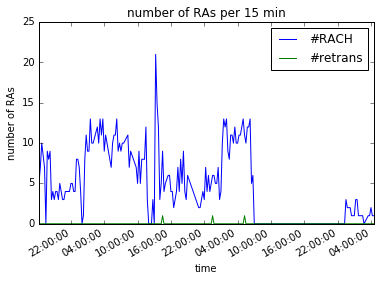

In [13]:
# plot the first 200 entries
plt.plot(x, y1 ,label='#RACH')
plt.plot(x, y2,label='#retrans')
# beautify the plot
plt.gcf().autofmt_xdate()

plt.xlabel('time')
plt.ylabel('number of RAs')
plt.title('number of RAs per 15 min')

plt.legend()

plt.show()

#### === bar plot

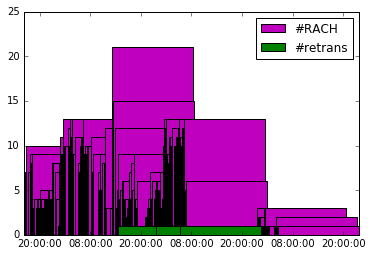

In [14]:
plt.bar(x, y1, label='#RACH', color = 'm')
plt.bar(x, y2, label='#retrans', color = 'g')
plt.legend()
plt.show()

# plt.bar(range(len(y1)),y1)
# plt.show()

#### === histogram

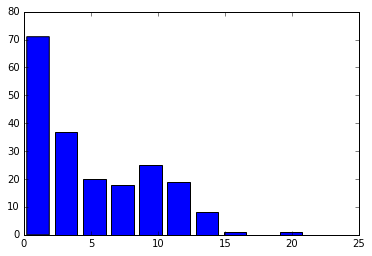

In [15]:
plt.hist(y1, histtype ='bar',rwidth=0.8)
plt.show()

# bins = [0,5,10,15,20]
# plt.hist(y1, bins, histtype='bar',rwidth=0.8)
# plt.show()

# plt.hist(y1, cumulative = 'True', rwidth=0.8)
# plt.show()

#### === scatter plot

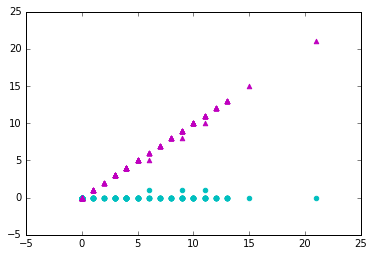

In [16]:
plt.scatter(y1,y2,marker='o',color='c')
plt.scatter(y1,y3,marker='^',color='m')
plt.show()

#### === stack plot

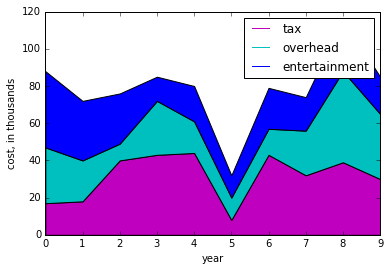

In [7]:
year = range(10)
taxes = [17, 18,40,43,44,8,43,32,39,30]
overhead = [30,22,9,29,17,12,14,24,49,35]
entertainment = [41,32,27,13,19,12,22,18,28,20]

plt.plot([],[],color='m',label='tax')
plt.plot([],[],color='c',label='overhead')
plt.plot([],[],color='b',label='entertainment')

plt.stackplot(year, taxes, overhead, entertainment, colors=['m','c','b'])
plt.legend()
plt.xlabel('year')
plt.ylabel('cost, in thousands')
plt.show()

#### === pie plot

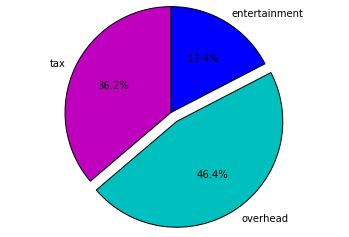

In [8]:
labels = 'tax','overhead','entertainment'
sizes = [25,32,12]
colors = ['m','c','b']

plt.pie(sizes, labels=labels, colors=colors, startangle=90, autopct='%1.1f%%', explode=(0, 0.1, 0))
plt.axis('equal')
plt.show()

### ====== load data from csv ======

### ====== load data with numpy ======